
# Machine Learning Project: Breast Cancer Prediction (Benign vs Malignant)



# MLDLC (Machine Learning Development Life Cycle)
The following project " breast-cancer-classification-ml " follows the following MLDLC

# 1. Understanding the Data
Check dataset size, columns, and sample values.

# 2. Data Preprocessing
Remove unwanted columns, encode target, split data, scale features.

# 3. EDA (Exploratory Data Analysis) – Basic
Visualize class distribution and feature correlations.

# 4. Feature Engineering and Feature Selection
Feature Transformation : Scale and prepare features for models.
Feature Selection (SelectKBest): Choose most important features.

# 5. Model Development (5 Algorithms)
Train Logistic Regression, KNN, SVM, Random Forest, Gradient Boosting.

# 6. Model Ranking
Compare models using accuracy score.

# 7. Model Saving and Deployment
Save best model and use it for prediction in Streamlit app.



#


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data.csv') # loads the dataset into a DataFrame

# UNDERSTANDING THE DATA 

 How big is your data, understanding number of rows and columns 

In [8]:
df.shape

(569, 33)

Displaying the first five rows of the dataset to understand its structure

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
df.sample(5) # Displays five random rows from the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
162,871201,M,19.590,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,...,26.39,174.90,2232.0,0.14380,0.3846,0.68100,0.22470,0.3643,0.09223,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,15.66,65.13,314.9,0.13240,0.1148,0.08867,0.06227,0.2450,0.07773,NaN
136,868223,B,11.710,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,...,25.48,86.16,546.7,0.12710,0.1028,0.10460,0.06968,0.1712,0.07343,NaN
94,862028,M,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,...,24.23,123.50,1025.0,0.15510,0.4203,0.52030,0.21150,0.2834,0.08234,NaN
477,911673,B,13.900,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,...,21.80,101.20,718.9,0.09384,0.2006,0.13840,0.06222,0.2679,0.07698,NaN


Displaying information about the dataset including column names, data types, and non-null values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
df.isnull().sum()  # Checks the number of missing values in each column of the dataset

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Key conclusions from df.isnull().sum()
	1.	Dataset is clean (no missing values in important columns)
	2.	Only one useless column exists: Unnamed: 32
	4.	No need for missing value imputation

In [20]:
df.describe # Displays statistical summary (mean, min, max, std, etc.) of numerical features

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [21]:
df.duplicated().sum()  # Checks the number of duplicate rows in the dataset

0

We got zero duplicate Data 

# Data Preprocessing

In [25]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)  # Removing columns that are not useful for prediction

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [28]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})  # Converting diagnosis into numerical form

In [30]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
547,0,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,...,10.83,22.04,71.08,357.4,0.14610,0.2246,0.1783,0.08333,0.2691,0.09479
431,0,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.14500,0.2629,0.2403,0.07370,0.2556,0.09359
211,0,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,...,13.30,24.99,85.22,546.3,0.12800,0.1880,0.1471,0.06913,0.2535,0.07993
194,1,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.08,27.78,118.60,784.7,0.13160,0.4648,0.4589,0.17270,0.3000,0.08701
243,0,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,...,15.01,26.34,98.00,706.0,0.09368,0.1442,0.1359,0.06106,0.2663,0.06321


# EDA (Exploratory Data Analysis) - basic

In [32]:
df['diagnosis'].value_counts() # Checking how many benign and malignant cases are present

diagnosis
0    357
1    212
Name: count, dtype: int64

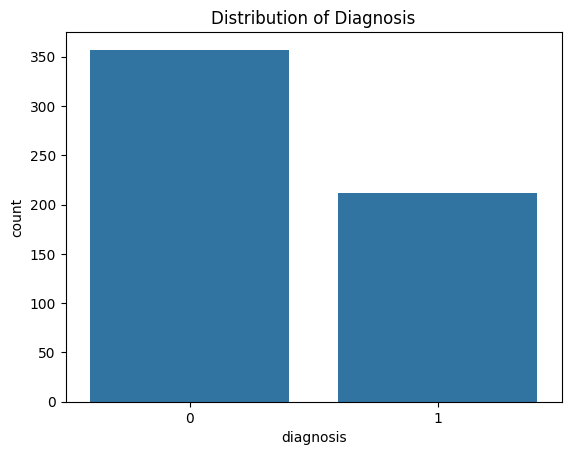

In [45]:
# Visualizing the distribution of benign and malignant cases

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.title("Distribution of Diagnosis")
plt.show()

It creates a bar chart that shows: how many samples are Benign (0), how many samples are Malignant (1)

In [48]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [50]:
# Computing correlation matrix for numerical features
df_corr = df.copy()
df_corr['diagnosis'] = df_corr['diagnosis'].map({'B':0, 'M':1})
corr_matrix = df_corr.corr(numeric_only=True)
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,NaN,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,NaN,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,NaN,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,NaN,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,NaN,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,NaN,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,NaN,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,NaN,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,NaN,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


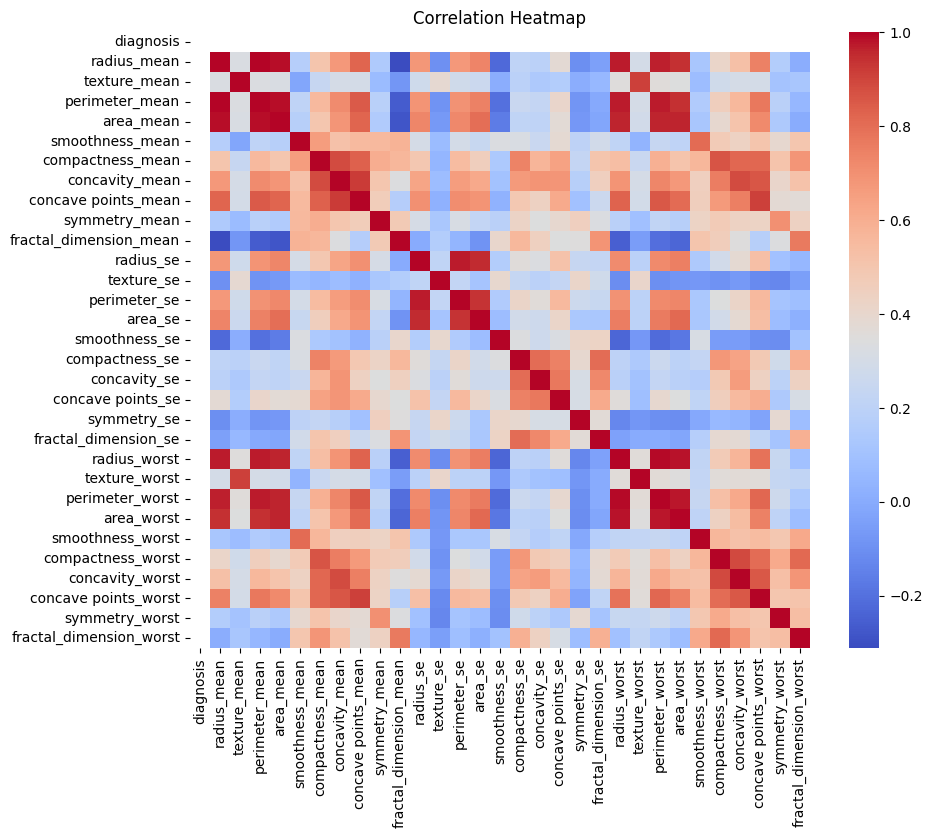

In [52]:
# Visualizing correlation between features using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering and Feature Selection


# 1. Feature Transformation.

In [56]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [58]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Using Train–Test Split technique split the dataset into: Training data - used to train the model, Testing data- used to evaluate the mode

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_test = scaler.transform(X_test)

In [67]:
X_test

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

# Feature Selection (using SelectKBest)

In [70]:
from sklearn.feature_selection import SelectKBest, f_classif

In [71]:
selector = SelectKBest(score_func=f_classif, k=10)

In [74]:
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [76]:
# check which features were selected and which were not.
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


# Model Development Using 5 different Algorithms.
# 1. Logistic Regression, 
# 2. KNN, 
# 3. SVM, 
# 4. Random Forest, 
# 5. and Gradient Boosting

# Algorithm 1: Logistic Regression

In [80]:
# Training and evaluating Logistic Regression model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
# Create Logistic Regression model
lr = LogisticRegression(max_iter=1000)

In [86]:
# Train the model using selected features
lr.fit(X_train_selected, y_train)

LogisticRegression(max_iter=1000)

In [88]:
# Predict on test data
y_pred_lr = lr.predict(X_test_selected)

In [90]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.9736842105263158


# Algorithm 2: KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

In [97]:
# Train the model using selected features
knn.fit(X_train_selected, y_train)

KNeighborsClassifier()

In [99]:
# Predict on test data
y_pred_knn = knn.predict(X_test_selected)

In [101]:
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.9736842105263158


#  Algorithm 3: SVM 

In [104]:
from sklearn.svm import SVC

In [106]:
# Create the model
svm = SVC(kernel='linear')

In [108]:
# Train the model using selected features
svm.fit(X_train_selected, y_train)

SVC(kernel='linear')

In [110]:
# Predict on test data
y_pred_svm = svm.predict(X_test_selected)

In [112]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9824561403508771


# Algorithm 4: Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Create Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [119]:
# Train the model using selected features
rf.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [121]:
# Predict on test data
y_pred_rf = rf.predict(X_test_selected)

In [123]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.956140350877193


# Algorithm 5: Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
# Create Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

In [130]:
# Train the model using selected features
gb.fit(X_train_selected, y_train)

GradientBoostingClassifier(random_state=42)

In [132]:
# Predict on test data
y_pred_gb = gb.predict(X_test_selected)

In [134]:
# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.956140350877193


# Ranking all models based on their accuracy scores

In [137]:
model_scores = {
    "Logistic Regression": accuracy_lr,
    "KNN": accuracy_knn,
    "SVM": accuracy_svm,
    "Random Forest": accuracy_rf,
    "Gradient Boosting": accuracy_gb
}


results_df = pd.DataFrame(model_scores.items(), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print(results_df)

                 Model  Accuracy
2                  SVM  0.982456
0  Logistic Regression  0.973684
1                  KNN  0.973684
3        Random Forest  0.956140
4    Gradient Boosting  0.956140


In [139]:
best_model_name = results_df.iloc[0]["Model"]
print("Best Model Name:", best_model_name)

Best Model Name: SVM


In [141]:
models = {
    "Logistic Regression": lr,
    "KNN": knn,
    "SVM": svm,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

In [143]:
# Select the best model object using its name
best_model = models[best_model_name]

print("Best model object selected:", best_model)

Best model object selected: SVC(kernel='linear')


In [145]:
import joblib

joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selector, "selector.pkl")

print("Best model and preprocessing objects saved successfully.")

Best model and preprocessing objects saved successfully.


In [147]:
import numpy as np

new_data = np.array([[14.5, 20.5, 95.2, 600.1, 0.1, 0.12, 0.13, 0.09,
                      0.18, 0.06, 0.3, 1.2, 2.3, 25.0, 0.01, 0.03,
                      0.04, 0.02, 0.01, 0.002, 16.3, 25.4, 110.2,
                      850.3, 0.14, 0.25, 0.27, 0.15, 0.3, 0.08]])

In [149]:
new_data_scaled = scaler.transform(new_data)
new_data_selected = selector.transform(new_data_scaled)

prediction = best_model.predict(new_data_selected)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [151]:
new_data_scaled = scaler.transform(new_data)
new_data_selected = selector.transform(new_data_scaled)

prediction = best_model.predict(new_data_selected)

if prediction[0] == 1:
    print("Malignant (Cancer Detected)")
else:
    print("Benign (No Cancer)")

Malignant (Cancer Detected)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [155]:
print("Predicted Label:", prediction[0])

if prediction[0] == 1:
    print("Result: Malignant (Cancer Detected)")
else:
    print("Result: Benign (No Cancer)")

Predicted Label: 1
Result: Malignant (Cancer Detected)


# For the given test input, the model predicted the label as 1, which corresponds to Malignant (Cancer Detected). This shows that the trained model can successfully classify new data samples.

In [344]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
